In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from matplotlib import cm 
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb
import cv2

from skimage.io import imread, imshow
from skimage.color import rgb2hsv

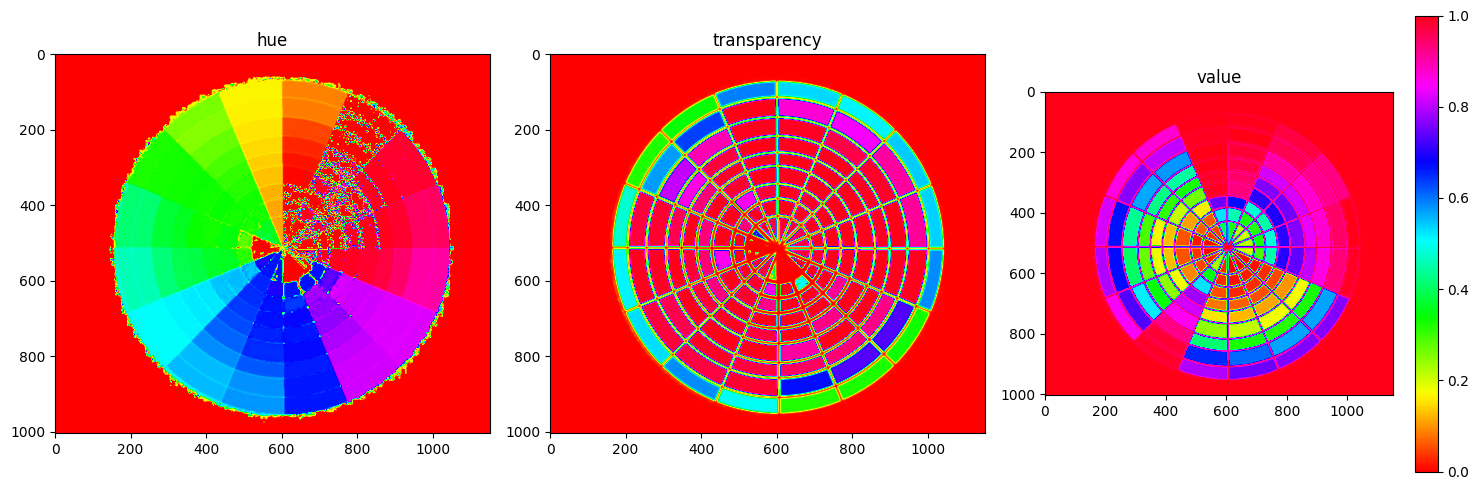

In [2]:
img = cv2.imread('circulo_corregido2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.GaussianBlur(img, (9,9), 0)
hsv_img = rgb2hsv(img)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('hue')

ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('transparency')

ax[2].imshow(hsv_img[:,:,2], cmap='hsv')
ax[2].set_title('value')

fig.colorbar(imshow(hsv_img[:,:,2], cmap='hsv'))
fig.tight_layout()

PCA - mascaras 

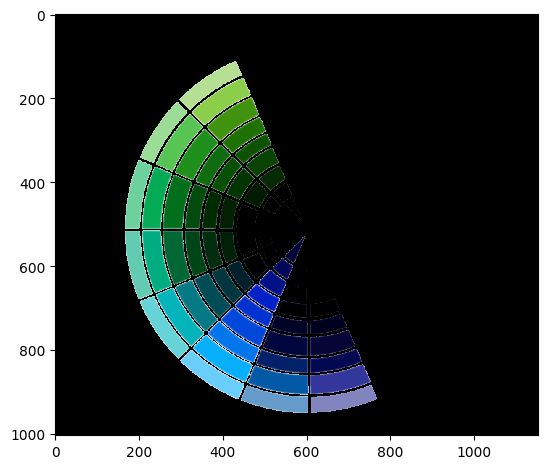

In [31]:
lower_mask = hsv_img[:,:,0] > 0.24

upper_mask = hsv_img[:,:,0] < 0.7

saturation_mask = hsv_img[:,:,1] > 0.2

value_mask = hsv_img[:,:,2] > 0.1
 
mask2 = upper_mask*lower_mask*saturation_mask*value_mask    

red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked_1 = np.dstack((red,green,blue))
imshow(img_masked_1)

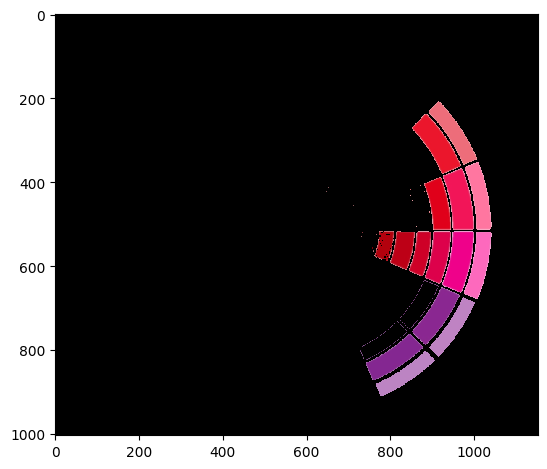

In [56]:
lower_mask = hsv_img[:,:,0] > 0.7

upper_mask = hsv_img[:,:,0] < 0.99



lower_saturation_mask = hsv_img[:,:,1] > 0.3

value_mask = hsv_img[:,:,2] > 0.4
 
mask2 = upper_mask*lower_mask*lower_saturation_mask*value_mask

red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked_2 = np.dstack((red,green,blue))
imshow(img_masked_2)

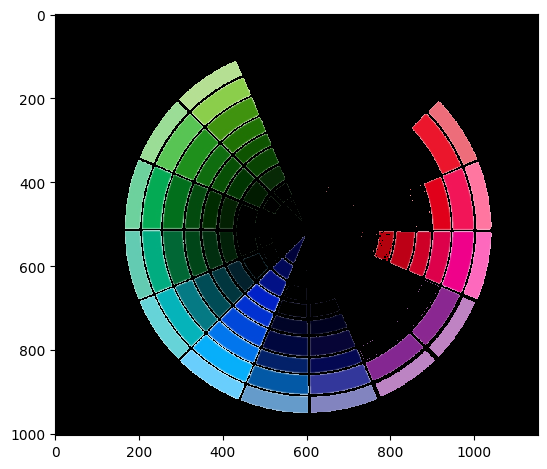

In [52]:
img_masked_final = img_masked_1 + img_masked_2
imshow(img_masked_final)

PRC - mascara 

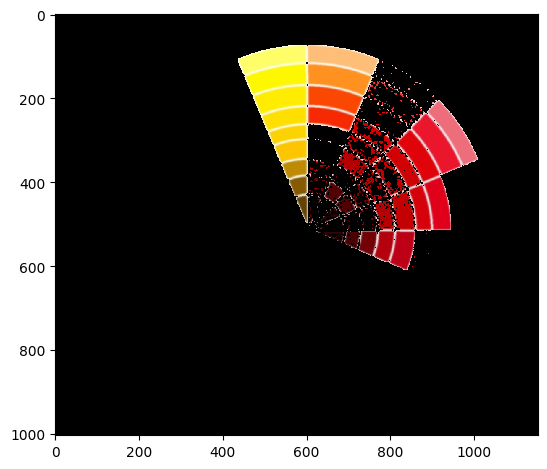

In [57]:
lower_mask2 = hsv_img[:,:,0] > 0.02

upper_mask2 = hsv_img[:,:,0] < 0.2

saturation_mask = hsv_img[:,:,1] > 0.08


lower_mask = hsv_img[:,:,0] > 0.97

upper_mask = hsv_img[:,:,0] < 1


#saturation_mask = hsv_img[:,:,1] > 0

#mask2 = upper_mask*lower_mask*saturation_mask

m_1 = (upper_mask & lower_mask)
m_2 = (upper_mask2 & lower_mask2)
mask2 = (m_1 | m_2) & saturation_mask


#red = img[:,:,0]*mask2
#green = img[:,:,1]*mask2
#blue = img[:,:,2]*mask2


red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red,green,blue))
imshow(img_masked)  


#img_masked  = np.dstack((red,green,blue))
#imshow(img_masked)

PRM - mascara

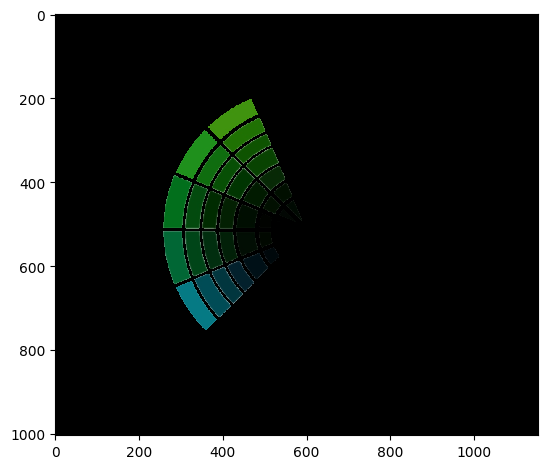

In [6]:
lower_mask = hsv_img[:,:,0] > 0.25

upper_mask = hsv_img[:,:,0] < 0.6

saturation_mask = hsv_img[:,:,1] > 0.2

value_mask = hsv_img[:,:,2] < 0.6

 
mask2 = upper_mask*lower_mask*saturation_mask*value_mask

red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2

img_masked = np.dstack((red,green,blue))
imshow(img_masked)